In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import get_project_root
from data_statistical_features import Segment
from ml_statistical_features import load_data_as_dataframe

import os

# Load Data

In [2]:
df = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=5)

features = df.drop(Segment.get_feature_name_array(), axis='columns')
target = df['informative']
bcg_hr = df['bcg_hr']
ecg_hr = df['ecg_hr']
patient_id = df['patient_id']

# Informative per patient

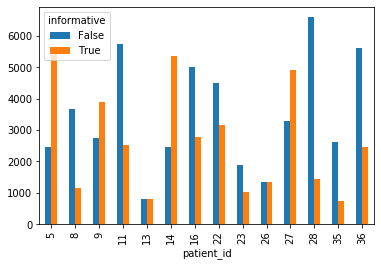

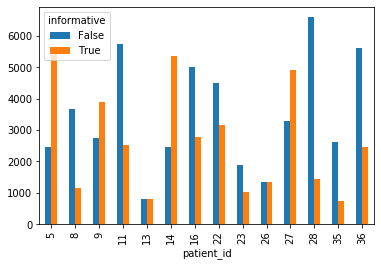

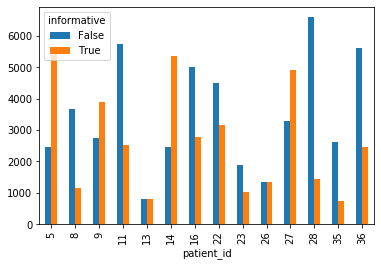

In [3]:
pd.crosstab(df['patient_id'],df['informative']).plot.bar()

# Correlation Heatmap

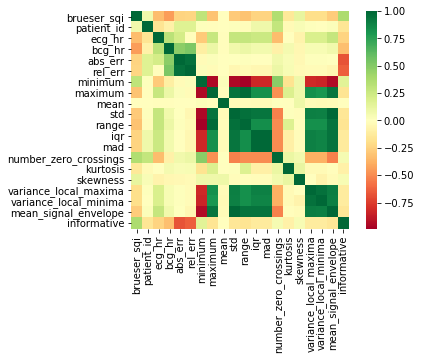

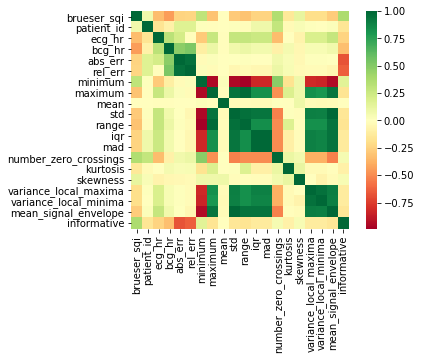

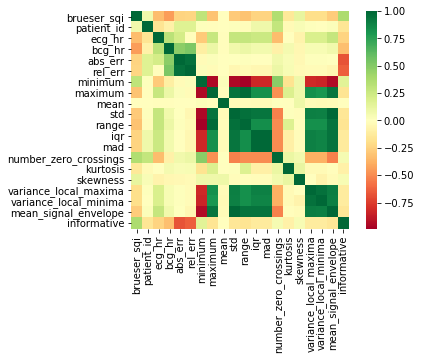

In [4]:
sns.heatmap(df.corr(), square=True, cmap ="RdYlGn")

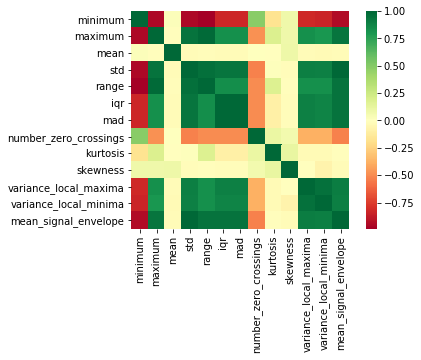

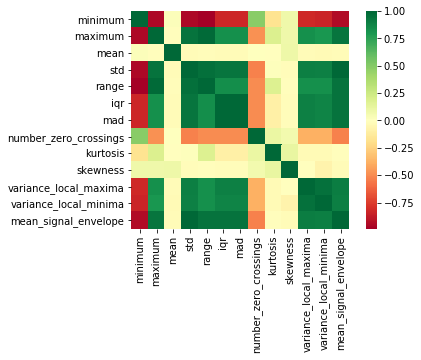

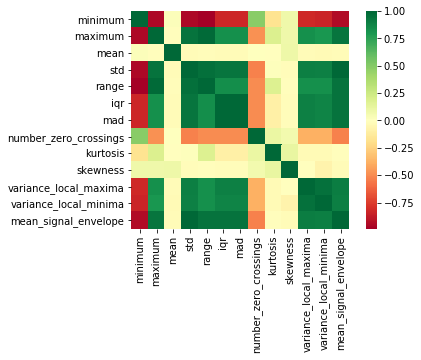

In [5]:
sns.heatmap(features.corr(), square=True, cmap ="RdYlGn")

# Paarweise geplottet

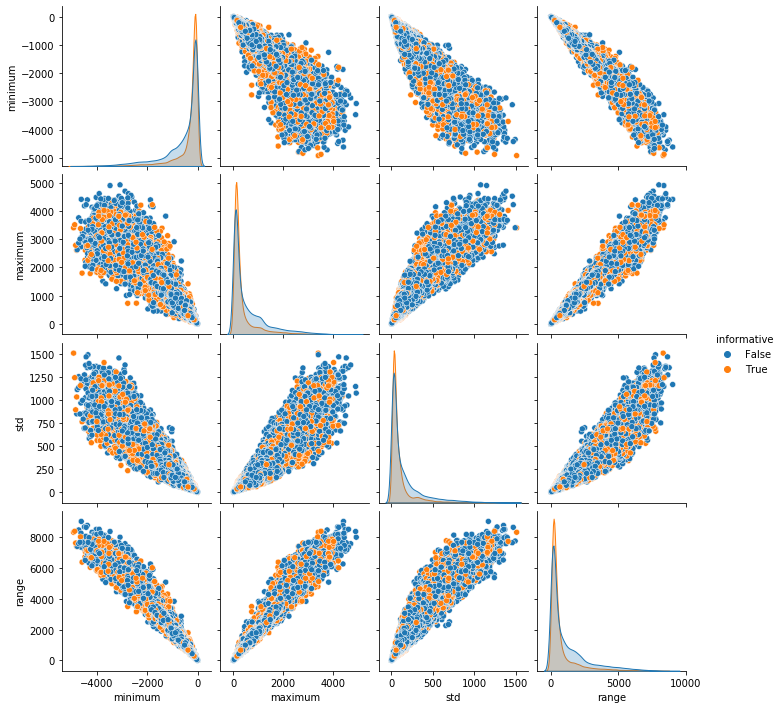

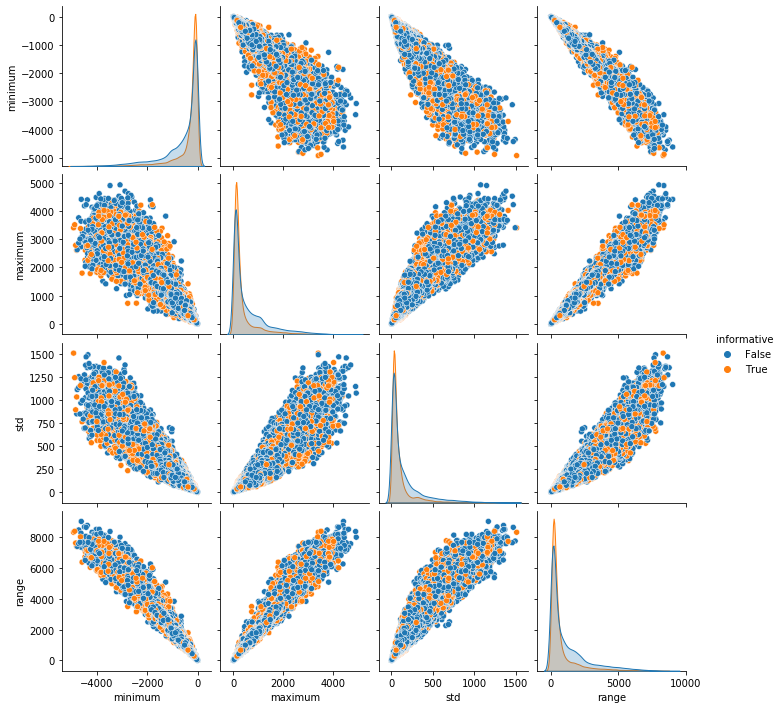

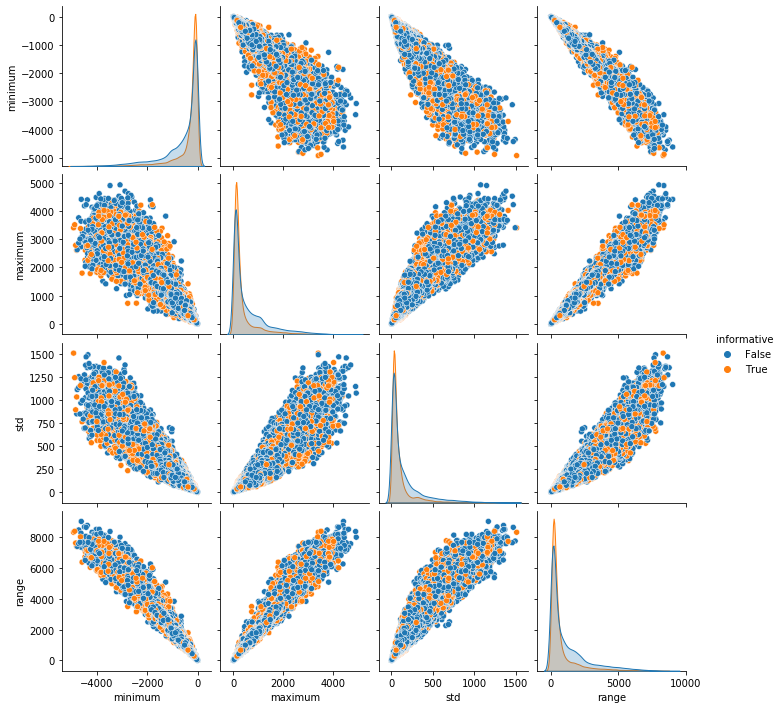

In [6]:
cols = ['minimum', 'maximum', 'std', 'range', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)

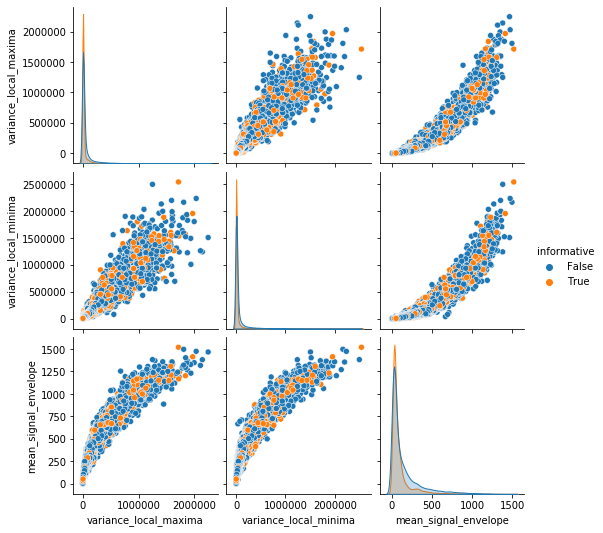

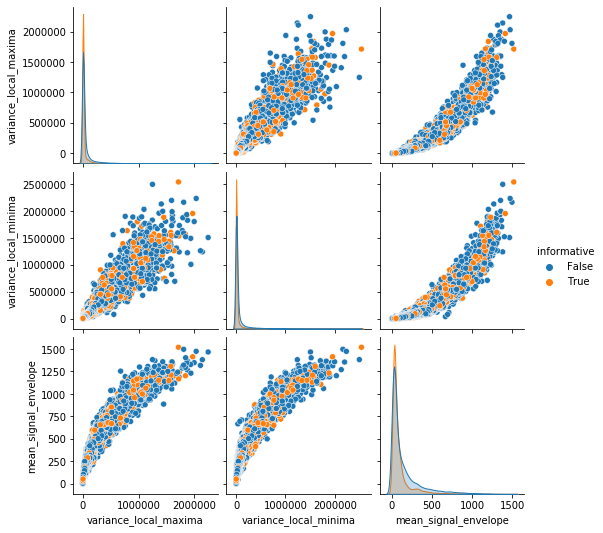

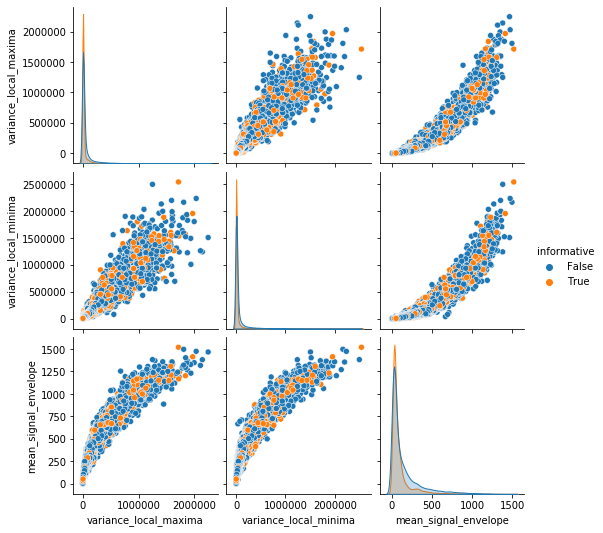

In [7]:
cols = ['variance_local_maxima', 'variance_local_minima', 'mean_signal_envelope', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)

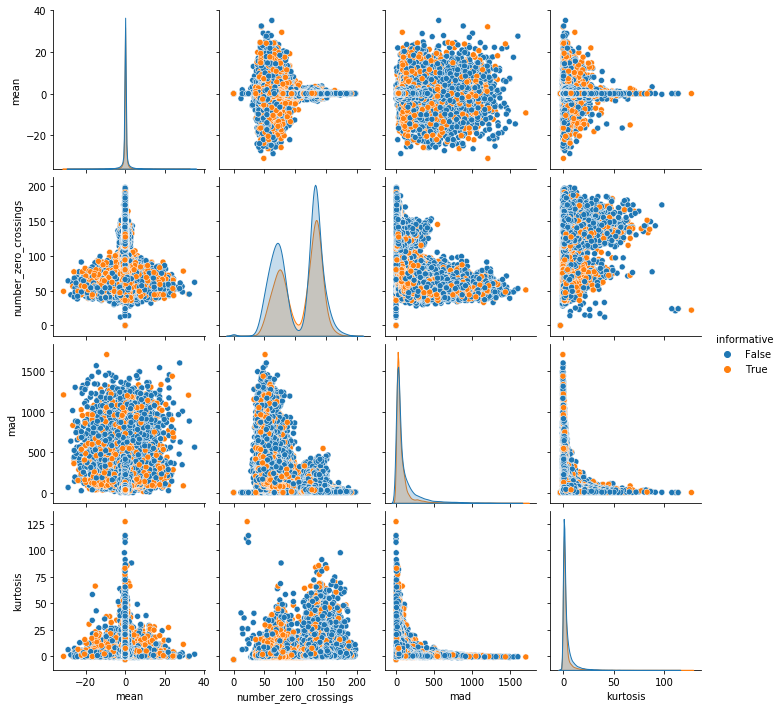

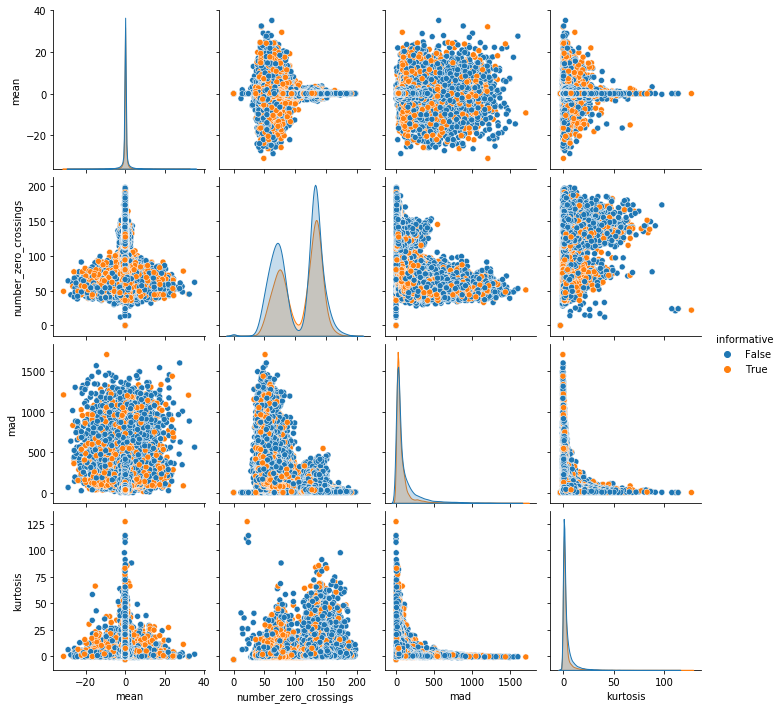

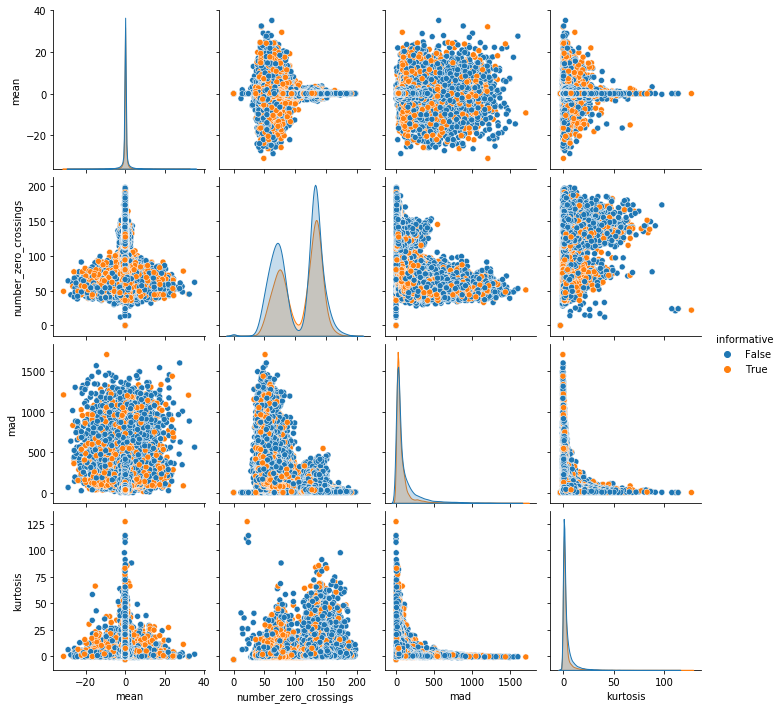

In [8]:
cols = ['mean', 'number_zero_crossings', 'mad', 'kurtosis', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)

# Boxplots features

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20,35))

df.boxplot(column=['minimum'],by='informative', ax=axes[0,0])
df.boxplot(column=['maximum'],by='informative', ax=axes[0,1])
df.boxplot(column=['mean'],by='informative', ax=axes[1,0])
df.boxplot(column=['std'],by='informative', ax=axes[1,1])
df.boxplot(column=['range'],by='informative', ax=axes[2,0])
df.boxplot(column=['iqr'],by='informative', ax=axes[2,1])
df.boxplot(column=['mad'],by='informative', ax=axes[3,0])
df.boxplot(column=['number_zero_crossings'],by='informative', ax=axes[3,1])
df.boxplot(column=['kurtosis'],by='informative', ax=axes[4,0])
df.boxplot(column=['skewness'],by='informative', ax=axes[4,1])
df.boxplot(column=['variance_local_maxima'],by='informative', ax=axes[5,0])
df.boxplot(column=['mean_signal_envelope'],by='informative', ax=axes[5,1])
# TODO: deal with inf values


plt.show()

# Fazit
- stark korrelierende Merkmale
- Dimensionsreduktion zur Reduzierung von stark korrelierenden Merkmalen sinnvoll
- keine klare Verteilung von informativ und nicht informativ, große Überlappung

# Einfluss der Merkmale bei Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier


from ml_statistical_features import get_patient_split

In [10]:
forest = RandomForestClassifier(random_state=1, class_weight='balanced')
x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.33)

forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

RandomForestClassifier(class_weight='balanced', random_state=1)

RandomForestClassifier(class_weight='balanced', random_state=1)

 1) skewness                       0.098263
 2) number_zero_crossings          0.087970
 3) variance_local_maxima          0.079889
 4) variance_local_minima          0.078995
 5) mad                            0.078052
 6) maximum                        0.077171
 7) range                          0.077100
 8) iqr                            0.077044
 9) kurtosis                       0.076402
10) minimum                        0.072508
11) mean_signal_envelope           0.070357
12) std                            0.067103
13) mean                           0.059145
 1) skewness                       0.098263
 2) number_zero_crossings          0.087970
 3) variance_local_maxima          0.079889
 4) variance_local_minima          0.078995
 5) mad                            0.078052
 6) maximum                        0.077171
 7) range                          0.077100
 8) iqr                            0.077044
 9) kurtosis                       0.076402
10) minimum                     

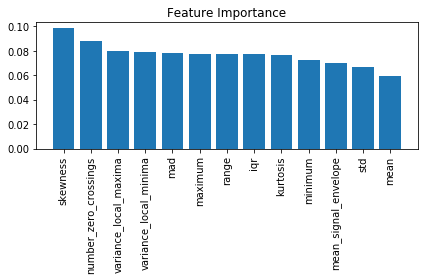

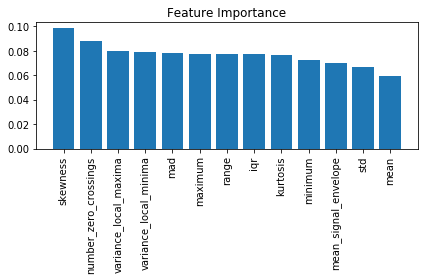

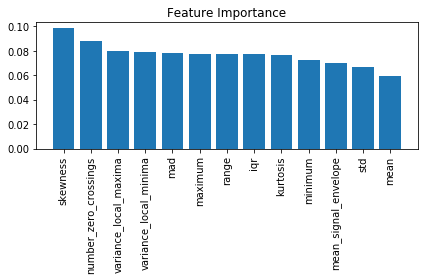

In [11]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [12]:
from sklearn.decomposition import KernelPCA

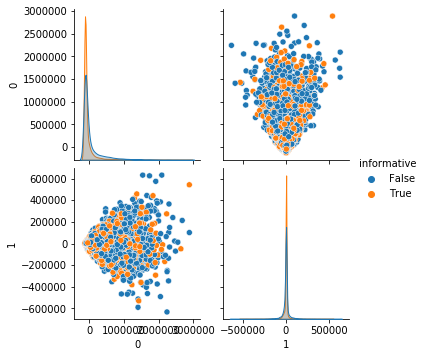

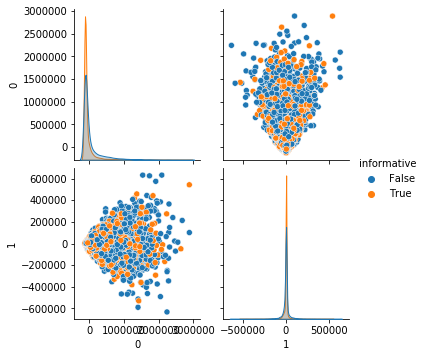

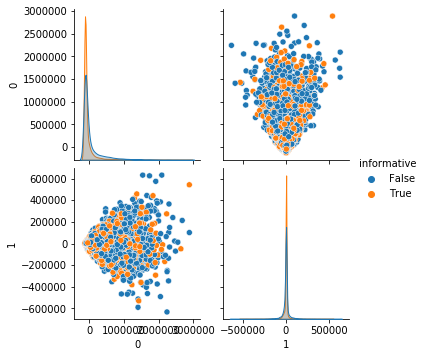

In [13]:
pca = KernelPCA(n_components=2)
x_transform = pca.fit_transform(x_test)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

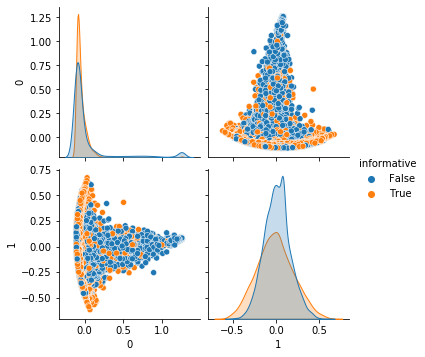

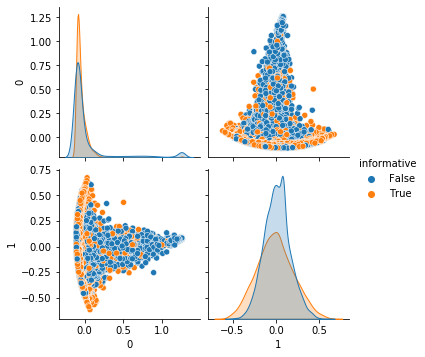

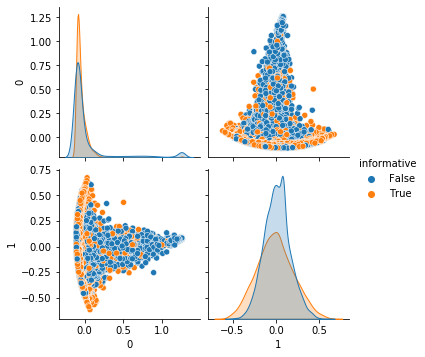

In [14]:
pca = KernelPCA(n_components=2, kernel='cosine')
x_transform = pca.fit_transform(x_test)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
pca = KernelPCA(n_components=2, kernel='poly', degree=3)
x_transform = pca.fit_transform(x_test)

df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')